In [14]:
import scipy as sp
import scipy.interpolate
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.interpolate


In [27]:
location = './acceptance_angle/'

#angle and acceptance as a function of energy
csv_foracceptance = 'acceptance.csv'
csv_forangle = 'containment_angle.csv'

In [28]:
energy_list = np.logspace(np.log10(1e0), np.log10(1e6))

In [29]:
def log_interp1d(xx, yy, kind='linear'):
    logx = np.log10(xx)
    logy = np.log10(yy)
    lin_interp = sp.interpolate.interp1d(logx, logy, kind=kind, fill_value = 'extrapolate')
    log_interp = lambda zz: np.power(10.0, lin_interp(np.log10(zz)))
    return log_interp

def get_acceptance_interp():
    accept = np.loadtxt(location + csv_foracceptance, delimiter = ',', dtype = float).T
    
    #plt.scatter(accept[0], accept[1]*1e4)
    #plt.xscale('log')
    
    return log_interp1d(accept[0], accept[1]*1e4)

def get_angle_interp():
    angle = np.loadtxt(location + csv_forangle, delimiter = ',', dtype = float).T
    print(angle)
    
    plt.scatter(angle[0], angle[1])
    plt.xscale('log')
    
    return log_interp1d(angle[0], angle[1])

    

[[1.00918904e+01 1.77264710e+01 3.16428794e+01 5.55982969e+01
  9.92837294e+01 1.77294260e+02 3.16620053e+02 5.56527710e+02
  9.93810056e+02 1.74661614e+03 3.11918554e+03 5.48092487e+03
  9.78379987e+03 1.74614309e+04 3.11483412e+04 5.55531354e+04
  9.74758053e+04 1.73804852e+05 3.05041368e+05 5.44007948e+05
  9.70300028e+05 1.70306034e+06 3.13658674e+06]
 [2.23899404e+01 1.64862768e+01 1.19231764e+01 8.02695375e+00
  5.21347280e+00 3.38612872e+00 2.16021831e+00 1.30606083e+00
  8.48281034e-01 5.31581506e-01 3.39128308e-01 2.24254240e-01
  1.62184761e-01 1.23773006e-01 1.09018250e-01 1.01325555e-01
  1.01177876e-01 1.01026202e-01 9.39013658e-02 8.88533617e-02
  8.11169243e-02 7.40571824e-02 6.88257213e-02]]
<function log_interp1d.<locals>.<lambda> at 0x7f9906013560>


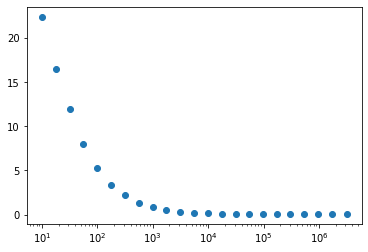

In [30]:
#get interpolation function of acceptance and angle
accept = get_acceptance_interp()
angle = get_angle_interp()

print(angle)


In [37]:
print(angle(50))
print(accept(10))

8.647833504459278
752.6579605711846


In [17]:
print(accept(313.1629103579625))

21786.799050651483


In [15]:
interp = accept(energy_list)
test_energy = 313.1629103579625


(0.1, 1000000.0)

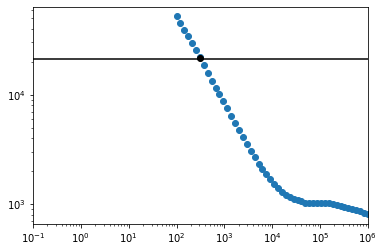

In [16]:
plt.scatter(energy_list, interp)
plt.scatter(test_energy, accept(test_energy), color = 'black')
plt.hlines(.2*4*np.pi*8500, 0, 1e50)
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-1, 1e6)

In [23]:
print(energy_list[15])
print(.2*4*np.pi*8500/accept(1676.8329368110067))

1676.8329368110067
3.885193756775937


In [27]:
print(energy_list[6])

308.88435964774817
